In [1]:
# Split a Dataset into Train, Test and Validation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import os

# print current working directory
print(os.getcwd())
# Change to the directory where the script is located
os.chdir("/workspaces/Bakery_predictions/0_DataPreparation/initialdata")

# Import Data to dataframe

# Handling string data and missing values
data = pd.read_csv("merged_data_temperature+weather_impression.csv")


# data = pd.read_csv("merged_data_temperature+weather_impression.csv")
data.info()

print(data.shape)

/workspaces/Bakery_predictions/2_BaselineModel/Linear_regression_Melissa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10103 entries, 0 to 10102
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                10103 non-null  object 
 1   Weekday              10103 non-null  object 
 2   Bewoelkung           10048 non-null  float64
 3   Temperatur           10103 non-null  float64
 4   Windgeschwindigkeit  10103 non-null  int64  
 5   Wettercode           10103 non-null  float64
 6   id                   9318 non-null   float64
 7   Warengruppe          9318 non-null   object 
 8   Umsatz               9318 non-null   float64
 9   KielerWoche          250 non-null    float64
 10  AverageTemp          10103 non-null  float64
 11  Temp_Deviation       10103 non-null  float64
 12  Temp_vs_Avg          10103 non-null  object 
 13  Weather_Impression   10103 non-null  object 
dtypes: float64(8)

In [2]:
data.notnull().sum()

Datum                  10103
Weekday                10103
Bewoelkung             10048
Temperatur             10103
Windgeschwindigkeit    10103
Wettercode             10103
id                      9318
Warengruppe             9318
Umsatz                  9318
KielerWoche              250
AverageTemp            10103
Temp_Deviation         10103
Temp_vs_Avg            10103
Weather_Impression     10103
dtype: int64

In [3]:
data.isnull().sum()

Datum                     0
Weekday                   0
Bewoelkung               55
Temperatur                0
Windgeschwindigkeit       0
Wettercode                0
id                      785
Warengruppe             785
Umsatz                  785
KielerWoche            9853
AverageTemp               0
Temp_Deviation            0
Temp_vs_Avg               0
Weather_Impression        0
dtype: int64

In [4]:
# replace NaN values with 0 in the Umsatz column
data[["Umsatz", "KielerWoche", "id"]] = data[["Umsatz", "KielerWoche", "id"]].fillna(0)
data[["Warengruppe", "Bewoelkung"]] = data[["Warengruppe", "Bewoelkung"]].fillna(
    "keine Angabe"
)
data.isnull().sum()

Datum                  0
Weekday                0
Bewoelkung             0
Temperatur             0
Windgeschwindigkeit    0
Wettercode             0
id                     0
Warengruppe            0
Umsatz                 0
KielerWoche            0
AverageTemp            0
Temp_Deviation         0
Temp_vs_Avg            0
Weather_Impression     0
dtype: int64

In [5]:
# show distinct values of 'Warengruppe'
data["Warengruppe"].unique()
# make a list of unique values
unique_values = data["Warengruppe"].unique().tolist()
# print the list of unique values
print(unique_values)

['keine Angabe', 'Brot', 'Brötchen', 'Croissant', 'Konditorei', 'Kuchen', 'Saisonbrot']


In [6]:
# Convert the date column to datetime
data["Datum"] = pd.to_datetime(data["Datum"])


# Define timeranges
train_start = "2013-07-01"
train_end = "2017-07-31"
test_start = "2018-08-01"
test_end = "2019-07-31"
val_start = "2017-08-01"
val_end = "2018-07-31"


# Split the data into train, test and validation sets on dates
train_data = data[(data["Datum"] >= train_start) & (data["Datum"] <= train_end)]
test_data = data[(data["Datum"] >= test_start) & (data["Datum"] <= test_end)]
val_data = data[(data["Datum"] >= val_start) & (data["Datum"] <= val_end)]

# print shapes
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("Validation data shape:", val_data.shape)
train_data.head()

Train data shape: (7517, 14)
Test data shape: (352, 14)
Validation data shape: (1839, 14)


,Datum,Weekday,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,id,Warengruppe,Umsatz,KielerWoche,AverageTemp,Temp_Deviation,Temp_vs_Avg,Weather_Impression
394,2013-07-01,Monday,6.0,17.84,15,20.0,1307011.0,Brot,148.83,0.0,20.525278,-2.685278,Significantly colder,okay
395,2013-07-01,Monday,6.0,17.84,15,20.0,1307012.0,Brötchen,535.86,0.0,20.525278,-2.685278,Significantly colder,okay
396,2013-07-01,Monday,6.0,17.84,15,20.0,1307013.0,Croissant,201.20,0.0,20.525278,-2.685278,Significantly colder,okay
397,2013-07-01,Monday,6.0,17.84,15,20.0,1307014.0,Konditorei,65.89,0.0,20.525278,-2.685278,Significantly colder,okay
398,2013-07-01,Monday,6.0,17.84,15,20.0,1307015.0,Kuchen,317.48,0.0,20.525278,-2.685278,Significantly colder,okay


In [7]:
columns = train_data.columns.tolist()
columns

['Datum',
 'Weekday',
 'Bewoelkung',
 'Temperatur',
 'Windgeschwindigkeit',
 'Wettercode',
 'id',
 'Warengruppe',
 'Umsatz',
 'KielerWoche',
 'AverageTemp',
 'Temp_Deviation',
 'Temp_vs_Avg',
 'Weather_Impression']

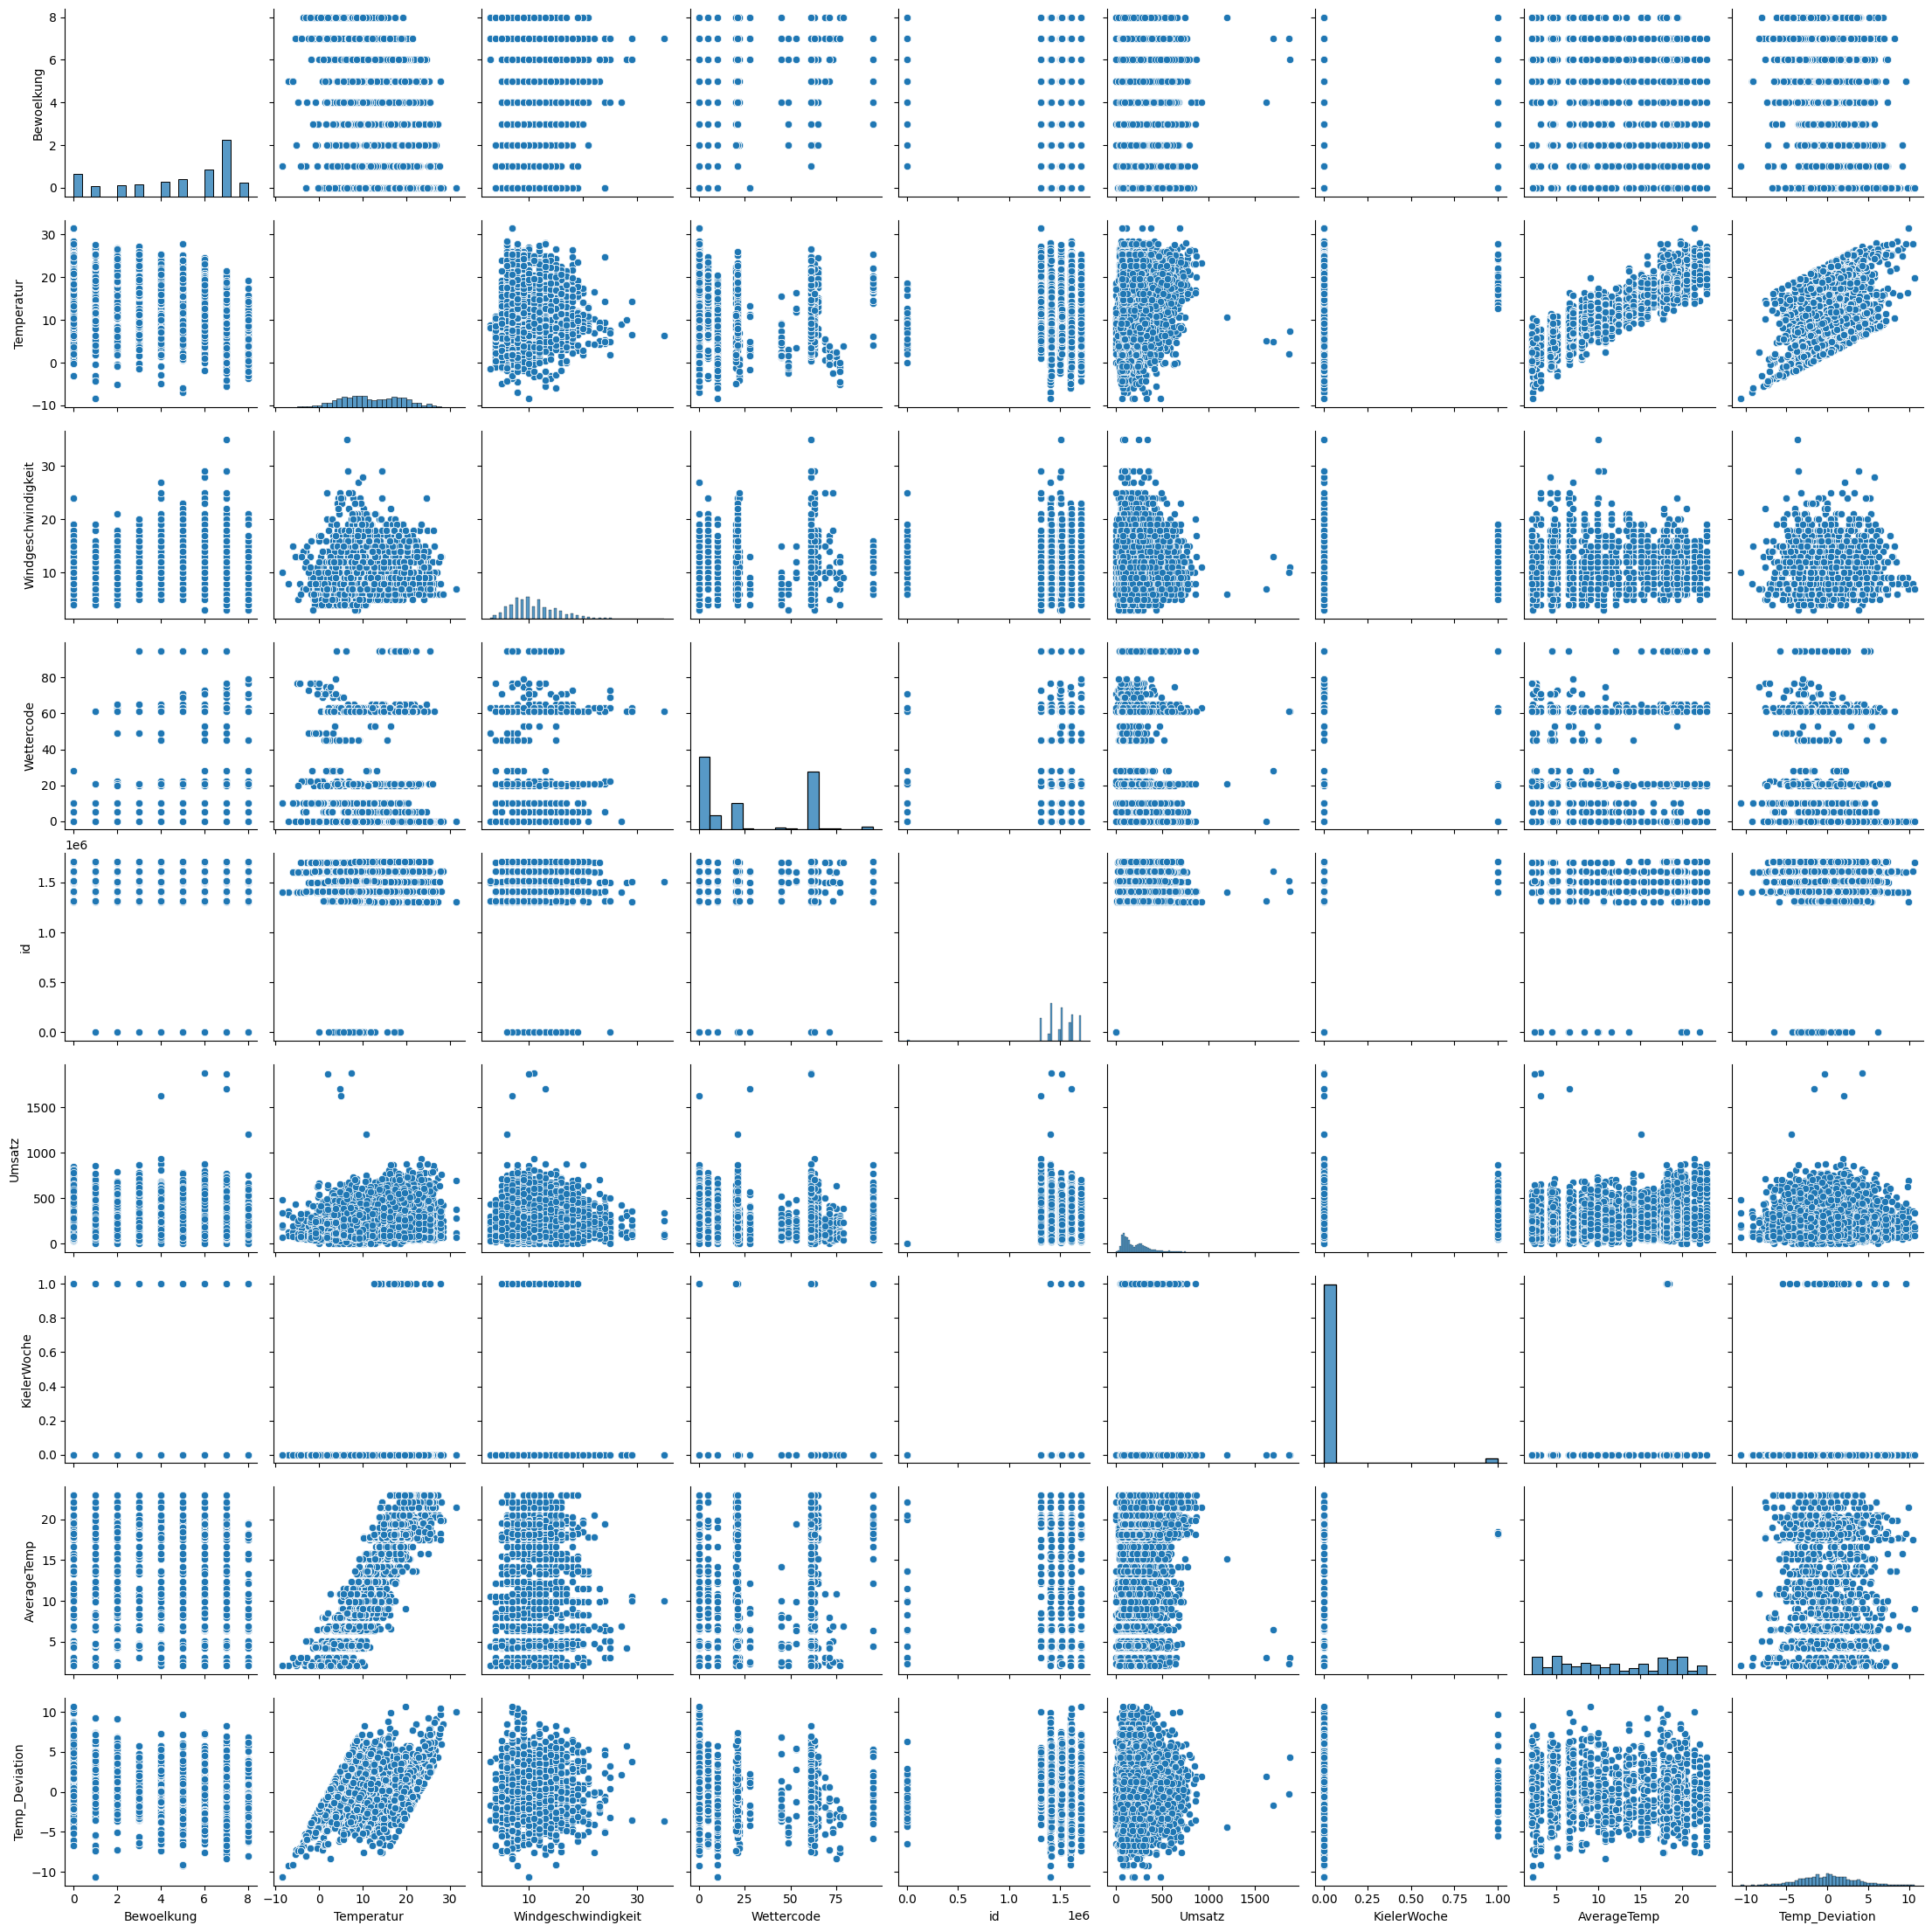

In [8]:
sns.pairplot(train_data[columns])

In [9]:
# convert datatypes of columns to numeric


for col in columns:
    if train_data[col].dtype == "object":
        # Convert to numeric, coercing errors to NaN
        train_data[col] = pd.to_numeric(train_data[col], errors="coerce")

# Check the data types of the columns
print(train_data.dtypes)

# Check for missing values
print(train_data.isnull().sum())


# Fill NaN values with 0 after conversion
# train_data[columns] = train_data[columns].fillna(0)
train_data[columns].corr()

Datum                  datetime64[ns]
Weekday                       float64
Bewoelkung                    float64
Temperatur                    float64
Windgeschwindigkeit             int64
Wettercode                    float64
id                            float64
Warengruppe                   float64
Umsatz                        float64
KielerWoche                   float64
AverageTemp                   float64
Temp_Deviation                float64
Temp_vs_Avg                   float64
Weather_Impression            float64
dtype: object
Datum                     0
Weekday                7517
Bewoelkung                0
Temperatur                0
Windgeschwindigkeit       0
Wettercode                0
id                        0
Warengruppe            7517
Umsatz                    0
KielerWoche               0
AverageTemp               0
Temp_Deviation            0
Temp_vs_Avg            7517
Weather_Impression     7517
dtype: int64


/tmp/ipykernel_1881/305604886.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = pd.to_numeric(train_data[col], errors="coerce")


,Datum,Weekday,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,id,Warengruppe,Umsatz,KielerWoche,AverageTemp,Temp_Deviation,Temp_vs_Avg,Weather_Impression
Datum,1.000000,NaN,0.046414,-0.052203,0.004648,0.045769,0.768468,NaN,-0.098433,0.058388,-0.021069,-0.072793,NaN,NaN
Weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bewoelkung,0.046414,NaN,1.000000,-0.376459,0.042912,0.549314,0.014219,NaN,-0.088132,0.002135,-0.270596,-0.283291,NaN,NaN
Temperatur,-0.052203,NaN,-0.376459,1.000000,0.003471,-0.204801,-0.060643,NaN,0.217605,0.145769,0.892810,0.398119,NaN,NaN
Windgeschwindigkeit,0.004648,NaN,0.042912,0.003471,1.000000,0.151729,0.011586,NaN,0.009936,0.000809,0.014588,-0.022016,NaN,NaN
Wettercode,0.045769,NaN,0.549314,-0.204801,0.151729,1.000000,0.032311,NaN,-0.046636,0.028253,-0.134065,-0.180885,NaN,NaN
id,0.768468,NaN,0.014219,-0.060643,0.011586,0.032311,1.000000,NaN,-0.022289,0.053187,-0.045607,-0.041526,NaN,NaN
Warengruppe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umsatz,-0.098433,NaN,-0.088132,0.217605,0.009936,-0.046636,-0.022289,NaN,1.000000,0.054294,0.234970,0.003765,NaN,NaN
KielerWoche,0.058388,NaN,0.002135,0.145769,0.000809,0.028253,0.053187,NaN,0.054294,1.000000,0.150300,0.016983,NaN,NaN


Correlation matrix:
                         Datum  Weekday  Bewoelkung  Temperatur  \
Datum                1.000000      NaN    0.046414   -0.052203   
Weekday                   NaN      NaN         NaN         NaN   
Bewoelkung           0.046414      NaN    1.000000   -0.376459   
Temperatur          -0.052203      NaN   -0.376459    1.000000   
Windgeschwindigkeit  0.004648      NaN    0.042912    0.003471   
Wettercode           0.045769      NaN    0.549314   -0.204801   
id                   0.768468      NaN    0.014219   -0.060643   
Warengruppe               NaN      NaN         NaN         NaN   
Umsatz              -0.098433      NaN   -0.088132    0.217605   
KielerWoche          0.058388      NaN    0.002135    0.145769   
AverageTemp         -0.021069      NaN   -0.270596    0.892810   
Temp_Deviation      -0.072793      NaN   -0.283291    0.398119   
Temp_vs_Avg               NaN      NaN         NaN         NaN   
Weather_Impression        NaN      NaN         NaN     

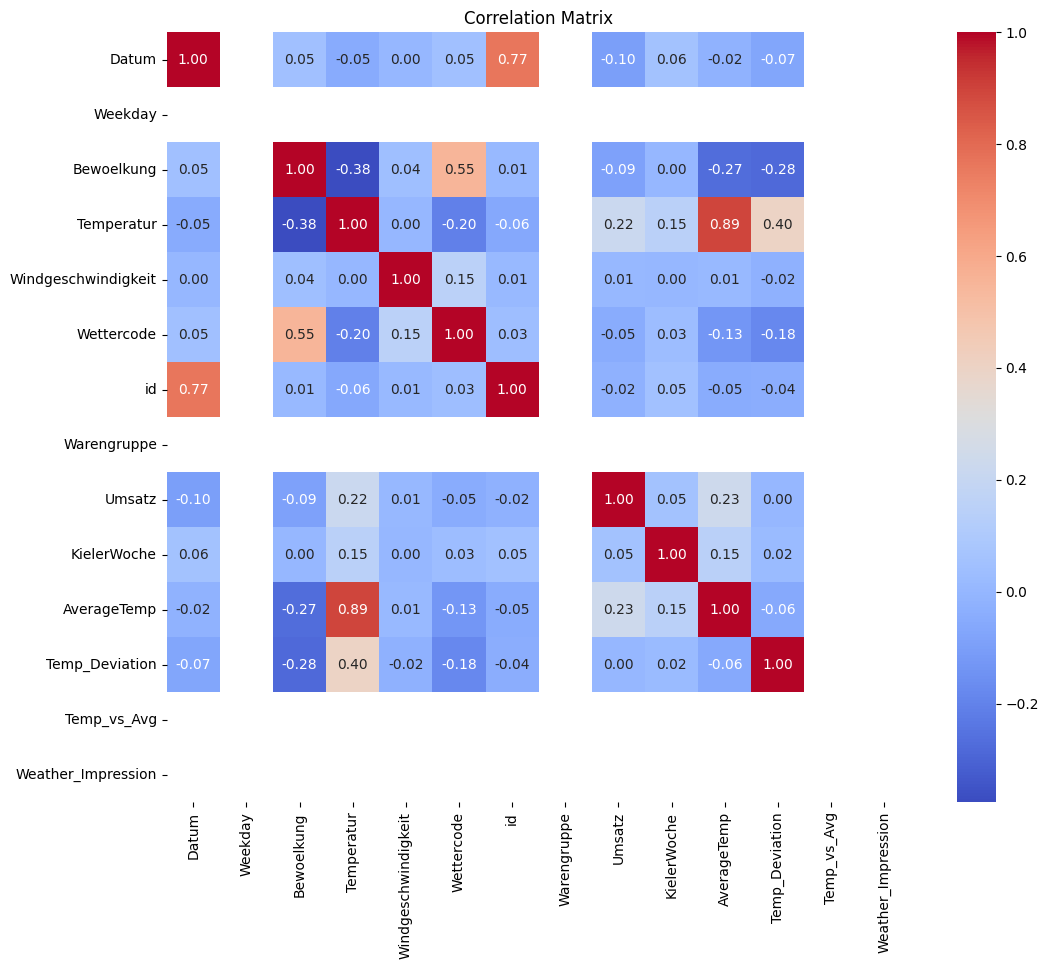

In [10]:
# scan for highly correlated features and print a list of pairs
# Calculate the correlation matrix
corr_matrix = train_data[columns].corr()
# Print the correlation matrix
print("Correlation matrix:\n", corr_matrix)

# Find pairs of highly correlated features
high_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = high_corr.stack().sort_values(ascending=False)
# delete self-correlations (1.0)
high_corr = high_corr[high_corr != 1.0]


# Print the pairs of highly correlated features
print("Highly correlated features:\n", high_corr)
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(train_data[columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Highly correlated features:
                      Datum  Weekday  Bewoelkung  Temperatur  \
Datum                  1.0      NaN         NaN         NaN   
Weekday                NaN      NaN         NaN         NaN   
Bewoelkung             NaN      NaN         1.0         NaN   
Temperatur             NaN      NaN         NaN     1.00000   
Windgeschwindigkeit    NaN      NaN         NaN         NaN   
Wettercode             NaN      NaN         NaN         NaN   
id                     NaN      NaN         NaN         NaN   
Warengruppe            NaN      NaN         NaN         NaN   
Umsatz                 NaN      NaN         NaN         NaN   
KielerWoche            NaN      NaN         NaN         NaN   
AverageTemp            NaN      NaN         NaN     0.89281   
Temp_Deviation         NaN      NaN         NaN         NaN   
Temp_vs_Avg            NaN      NaN         NaN         NaN   
Weather_Impression     NaN      NaN         NaN         NaN   

                     Wind

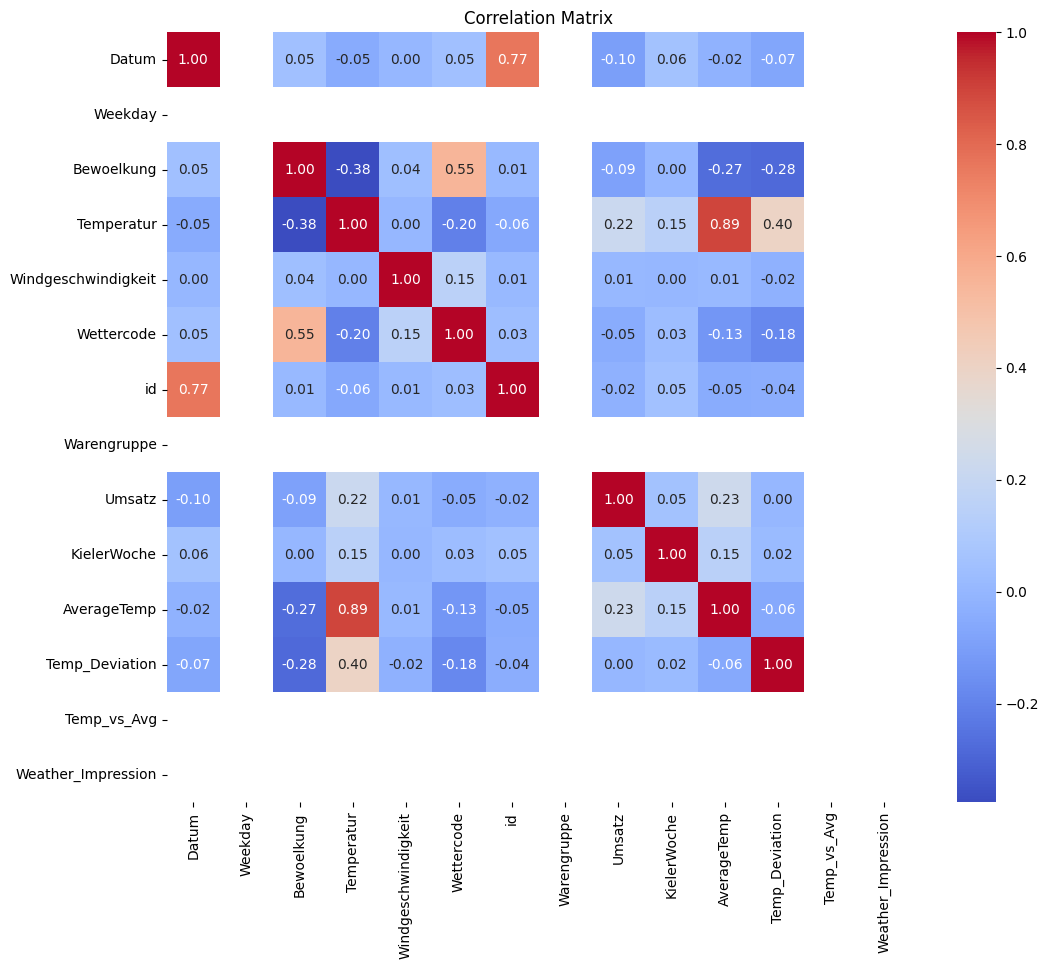

In [11]:
# print highest correlated features
high_corr = corr_matrix[corr_matrix.abs() > 0.8]
print("Highly correlated features:\n", high_corr)
train_data[columns].corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(train_data[columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<Axes: xlabel='Temperatur', ylabel='Umsatz'>

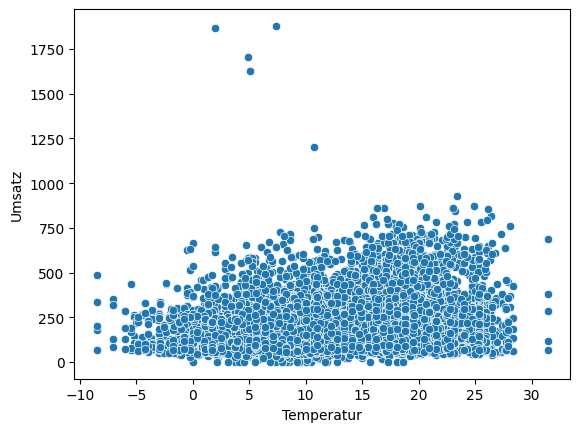

In [12]:
sns.scatterplot(x="Temperatur", y="Umsatz", data=train_data)

In [13]:
X = train_data["Temperatur"].values.reshape(-1, 1)  # Reshape for single feature
Y = sm.add_constant(train_data["Umsatz"])  # Add constant for intercept
# Check for NaNs
print(np.isnan(X).sum())

# Check for infinite values
# print(np.isinf(X).sum())
# X = X.replace([np.inf, -np.inf], np.nan)
# X = X.dropna()
# Y = Y.loc[X.index]  # Make sure Y matches X

0


In [17]:

X = sm.add_constant(train_data["Temperatur"])  # shape (7517, 2)
y = train_data["Umsatz"]  # shape (7517,)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     373.5
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           2.91e-81
Time:                        15:19:53   Log-Likelihood:                -48051.
No. Observations:                7517   AIC:                         9.611e+04
Df Residuals:                    7515   BIC:                         9.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.1377      3.315     46.199      0.0

In [18]:
X = sm.add_constant(train_data["AverageTemp"])  # shape (7517, 2)
y = train_data["Umsatz"]  # shape (7517,)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     439.2
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           8.18e-95
Time:                        15:20:23   Log-Likelihood:                -48020.
No. Observations:                7517   AIC:                         9.604e+04
Df Residuals:                    7515   BIC:                         9.606e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         143.8599      3.503     41.063      

In [15]:
print(train_data["Warengruppe"])

394    NaN
395    NaN
396    NaN
397    NaN
398    NaN
        ..
7906   NaN
7907   NaN
7908   NaN
7909   NaN
7910   NaN
Name: Warengruppe, Length: 7517, dtype: float64
